Enter city name: delhi
Coordinates found for delhi: Lat=28.6517178, Lon=77.2219388
AQI data found for lat:28.6517178, lon:77.2219388.

AQI for delhi: 4
AQI Level: Poor (Everyone may begin to experience health effects.)


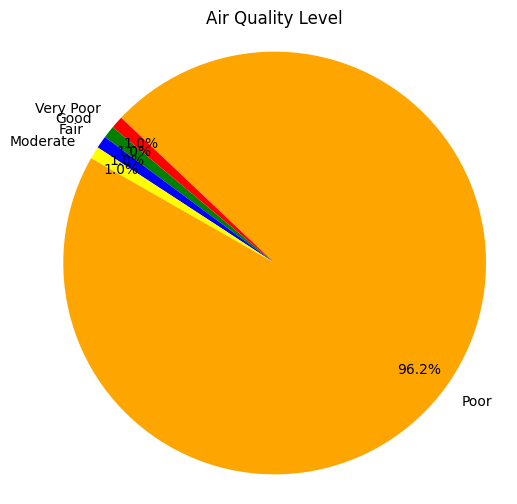

In [2]:
import requests
import matplotlib.pyplot as plt

API_KEY = "f4f03a82258ea731abd7da24dc7c75ea"

def get_coordinates(city):
    """Fetches latitude and longitude for a given city using OpenWeatherMap Geocoding API."""
    url = f"http://api.openweathermap.org/geo/1.0/direct?q={city}&limit=1&appid={API_KEY}"
    try:
        response = requests.get(url)
        response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)
        res = response.json()
        if res:
            print(f"Coordinates found for {city}: Lat={res[0]['lat']}, Lon={res[0]['lon']}")
            return res[0]['lat'], res[0]['lon']
        else:
            print(f"⚠️ City not found or no coordinates returned for: {city}. Please check city spelling and API key.")
            return None, None
    except requests.exceptions.RequestException as e:
        print(f"❌ Error fetching coordinates for {city}: {e}")
        return None, None
    except Exception as e:
        print(f"❌ An unexpected error occurred while fetching coordinates for {city}: {e}")
        return None, None


def get_aqi(lat, lon):
    """Fetches Air Quality Index (AQI) for given coordinates using OpenWeatherMap Air Pollution API."""
    url = f"http://api.openweathermap.org/data/2.5/air_pollution?lat={lat}&lon={lon}&appid={API_KEY}"
    try:
        response = requests.get(url)
        response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)
        res = response.json()
        # Check if 'list' key exists and is not empty before accessing elements
        if 'list' in res and res['list']:
            print(f"AQI data found for lat:{lat}, lon:{lon}.")
            return res['list'][0]['main']['aqi']
        else:
            print(f"⚠️ Could not retrieve AQI data for lat:{lat}, lon:{lon}. API response missing 'list' or is empty.")
            return None
    except requests.exceptions.RequestException as e:
        print(f"❌ Error fetching AQI for lat:{lat}, lon:{lon}: {e}")
        return None
    except Exception as e:
        print(f"❌ An unexpected error occurred while fetching AQI for lat:{lat}, lon:{lon}: {e}")
        return None


def interpret_aqi(aqi):
    """Interprets the AQI value into a human-readable level."""
    levels = {
        1: "Good (Air quality is considered satisfactory.)",
        2: "Fair (Air quality is acceptable.)",
        3: "Moderate (Sensitive groups should reduce outdoor activities.)",
        4: "Poor (Everyone may begin to experience health effects.)",
        5: "Very Poor (Health warnings of emergency conditions.)"
    }
    return levels.get(aqi, "Unknown AQI level")

def show_pie_chart(aqi):
    """Displays a pie chart representing the AQI level."""
    if aqi is None or not 1 <= aqi <= 5:
        print("Cannot display pie chart for invalid or unknown AQI.")
        return

    labels = ['Good', 'Fair', 'Moderate', 'Poor', 'Very Poor']
    colors = ['green', 'blue', 'yellow', 'orange', 'red']
    # Create sizes list with 0 for all levels except the current AQI level
    sizes = [0] * 5
    sizes[aqi - 1] = 1

    # Add a small value to all sizes to ensure all slices are visible even if size is 0
    # This helps in cases where a single slice has a value of 1 and others are 0
    sizes = [s + 0.01 for s in sizes]


    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, colors=colors, startangle=140, autopct='%1.1f%%', pctdistance=0.85)
    plt.title('Air Quality Level')
    plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

def main():
    """Main function to get city input, fetch AQI, and display results."""
    city = input("Enter city name: ")
    lat, lon = get_coordinates(city)

    if lat is not None and lon is not None:
        aqi = get_aqi(lat, lon)
        if aqi is not None:
            print(f"\nAQI for {city}: {aqi}")
            print(f"AQI Level: {interpret_aqi(aqi)}")
            show_pie_chart(aqi)
        else:
            print(f"Failed to retrieve AQI for {city}.")
    else:
        print(f"Could not proceed due to failed coordinate retrieval for {city}.")


if __name__ == "__main__":
    main()